## **Reducción de Dimensionalidad y Benchmarking de Modelos (Core)**

### **Descripción:**

En este proyecto, aplicarás una combinación de técnicas avanzadas, comenzando por un análisis de reducción de dimensionalidad (como PCA) y luego realizarás un benchmark de diferentes modelos de machine learning para encontrar el que mejor se adecue a los objetivos específicos del dataset que has elegido.


### **Objetivo:**

El objetivo es realizar un análisis exhaustivo que comience con la reducción de dimensionalidad para simplificar el dataset y luego probar varios modelos de machine learning para determinar cuál ofrece el mejor rendimiento en términos de precisión, recall, F1-score u otras métricas relevantes para tu problema.


### **Instrucciones:**

### **1. Selección del dataset:**
- Utiliza el dataset que seleccionaste para el Proyecto 2 o elige uno adecuado de Kaggle que se relacione con tu área de interés. El dataset debe tener al menos 10 características y una variable objetivo clara.
- Realiza una exploración inicial para entender las variables y la relación que tienen con la variable objetivo.

### **2. Reducción de dimensionalidad:**
- Implementa un análisis de reducción de dimensionalidad utilizando PCA (u otra técnica adecuada). El objetivo es reducir el número de características, manteniendo al menos el 80-90% de la variabilidad original.
- Visualiza los componentes principales y discute cómo contribuyen a la variabilidad del dataset.
- Utiliza las características reducidas para simplificar el conjunto de datos.

### **3. Benchmarking de modelos:**
Implementa y compara al menos tres modelos de machine learning en el dataset reducido. Algunos ejemplos de modelos que puedes utilizar incluyen:

- Regresión logística
- Árboles de decisión
- Random Forest
- Support Vector Machines (SVM)

Para cada modelo, utiliza validación cruzada para medir su rendimiento de manera consistente. Registra las métricas más importantes, como la precisión, el recall, la F1-score y el AUC-ROC.

### **4. Análisis comparativo de modelos:**
- Compara los modelos en base a las métricas obtenidas. Discute cuál de los modelos es más adecuado para resolver el problema en cuestión y por qué.
- Si alguno de los modelos tiene un rendimiento significativamente inferior, analiza posibles causas y estrategias para mejorar el rendimiento (como ajustar hiperparámetros o utilizar técnicas de regularización).

### **5. Informe final:**

Elabora un informe detallado que incluya:

- El análisis de reducción de dimensionalidad, mostrando cómo PCA (u otra técnica) ayudó a reducir el número de características sin perder información relevante.
- Un análisis comparativo de los modelos probados, con gráficos que muestren el rendimiento de cada modelo.
- Conclusiones y recomendaciones sobre cuál modelo utilizarías en un escenario real.

**Dataset:** https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### **Librerias y Dataset**

In [1]:
import os
import pandas as pd
import numpy as np
import utils
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import kagglehub
import kaggle

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import utils
import kagglehub

In [2]:
# Descargar el dataset
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
print("Path to dataset files:", path)
# Cargar el dataset
dataset_path = os.path.join(path, "creditcard.csv")
df = pd.read_csv(dataset_path)

Path to dataset files: C:\Users\guill\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3


### **Exploratory Data Analysis**

In [3]:
print("Dimensiones del dataset:")
print(f"Features: {df.shape[1]}, Ejemplos: {df.shape[0]}")
print("Primeras 5 filas del dataset:")
df.head()

Dimensiones del dataset:
Features: 31, Ejemplos: 284807
Primeras 5 filas del dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### **Analisis de duplicados**

In [5]:
duplicados = df.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados en el dataset: {num_duplicados}")

Número de registros duplicados en el dataset: 1081


In [6]:
# Eliminar duplicados y actualizar el DataFrame
df = df.drop_duplicates()

# Identificar duplicados nuevamente
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados después de eliminarlos: {num_duplicados}")

Número de registros duplicados después de eliminarlos: 0


In [7]:
def plot_distributions2(data, 
                       nrows=None, 
                       ncols=None, 
                       figsize=None, 
                       color_palette="Set2", 
                       title='Distribuciones del Dataset',
                       bins='sqrt',
                       alpha=0.8,
                       edgecolor='black',
                       linewidth=0.5,
                       kde=False,
                       kde_kws=None,
                       show_iqr_and_legend=True):
    """
    Genera histogramas para todas las columnas numéricas de un dataset, incluyendo métricas IQR y KDE opcional,
    estilizado según un diseño atractivo y profesional.

    Parámetros:
    -----------
    show_iqr_and_legend : bool, opcional
        Si es True, muestra tanto los rangos IQR (Q1, Q2, Q3, IQR) como la leyenda asociada.
        Si es False, oculta ambos.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    import math

    plt.close('all')
    
    # Seleccionar solo columnas numéricas
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
    
    # Calcular dimensiones automáticamente si no se especifican
    if nrows is None or ncols is None:
        n_plots = len(numeric_cols)
        nrows = math.ceil(n_plots / math.ceil(math.sqrt(n_plots)))
        ncols = math.ceil(math.sqrt(n_plots))
    
    # Calcular tamaño de figura si no se especifica
    if figsize is None:
        figsize = (4*ncols, 3*nrows)
    
    # Crear subplots
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten() if nrows > 1 or ncols > 1 else [axes]

    # Paleta de colores
    colors = sns.color_palette(color_palette, len(numeric_cols))
    
    # Generar histogramas con métricas IQR
    for i, col in enumerate(numeric_cols):
        if i < len(axes):
            ax = axes[i]
            # Histograma con KDE opcional
            sns.histplot(
                data[col].dropna(),
                bins=bins,
                kde=kde,
                color=colors[i],
                alpha=alpha,
                edgecolor=edgecolor,
                linewidth=linewidth,
                ax=ax,
                kde_kws=kde_kws if kde else {}
            )
            ax.set_xlabel("")  # Esta línea elimina el título del eje x
            
            if show_iqr_and_legend:  # Mostrar rangos IQR y leyenda solo si es True
                # Cálculo de métricas
                Q1 = np.percentile(data[col].dropna(), 25)
                Q2 = np.percentile(data[col].dropna(), 50)
                Q3 = np.percentile(data[col].dropna(), 75)
                IQR = Q3 - Q1
                
                # Líneas de métricas
                ax.axvline(Q1, color="#b20710", linestyle="--", linewidth=0.7, label=f"Q1 ({Q1:.2f})")
                ax.axvline(Q2, color="#e50914", linestyle="--", linewidth=0.7, label=f"Q2 ({Q2:.2f})")
                ax.axvline(Q3, color="#b20710", linestyle="--", linewidth=0.7, label=f"Q3 ({Q3:.2f})")
                ax.axvspan(Q1, Q3, color="#f5f5f1", alpha=0.2, label=f"IQR ({IQR:.2f})")
            
            # Estética del título y rejilla
            ax.set_title(col, fontsize=12, pad=10, fontfamily='serif', loc='center')
            ax.grid(axis='y', linestyle='-', linewidth=0.6, color='gray', alpha=0.5)
            
            # Configuración de bordes y ticks
            for spine in ['top', 'right', 'left', 'bottom']:
                ax.spines[spine].set_visible(False)
            
            ax.tick_params(axis='x', labelsize=10, rotation=45, colors='black', length=0)
            ax.tick_params(axis='y', labelsize=10, colors='black', length=0)

            # Mostrar leyenda solo si show_iqr_and_legend es True
            if show_iqr_and_legend:
                ax.legend(fontsize=8, loc='upper right', frameon=False)

    # Eliminar ejes sobrantes
    for j in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[j])

    # Título general y ajuste
    fig.text(0.1, 1, title, fontsize=16, fontweight='bold', fontfamily='serif')
    fig.text(0.1, 0.95, 'Distribuciones de variables numéricas con rangos destacados', fontsize=12, fontfamily='serif', fontweight='light')
    plt.tight_layout()
    
    return fig

C:\Users\guill\AppData\Local\Temp\ipykernel_13496\2836733223.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  distributionplot.show()  # Muestra en pantalla


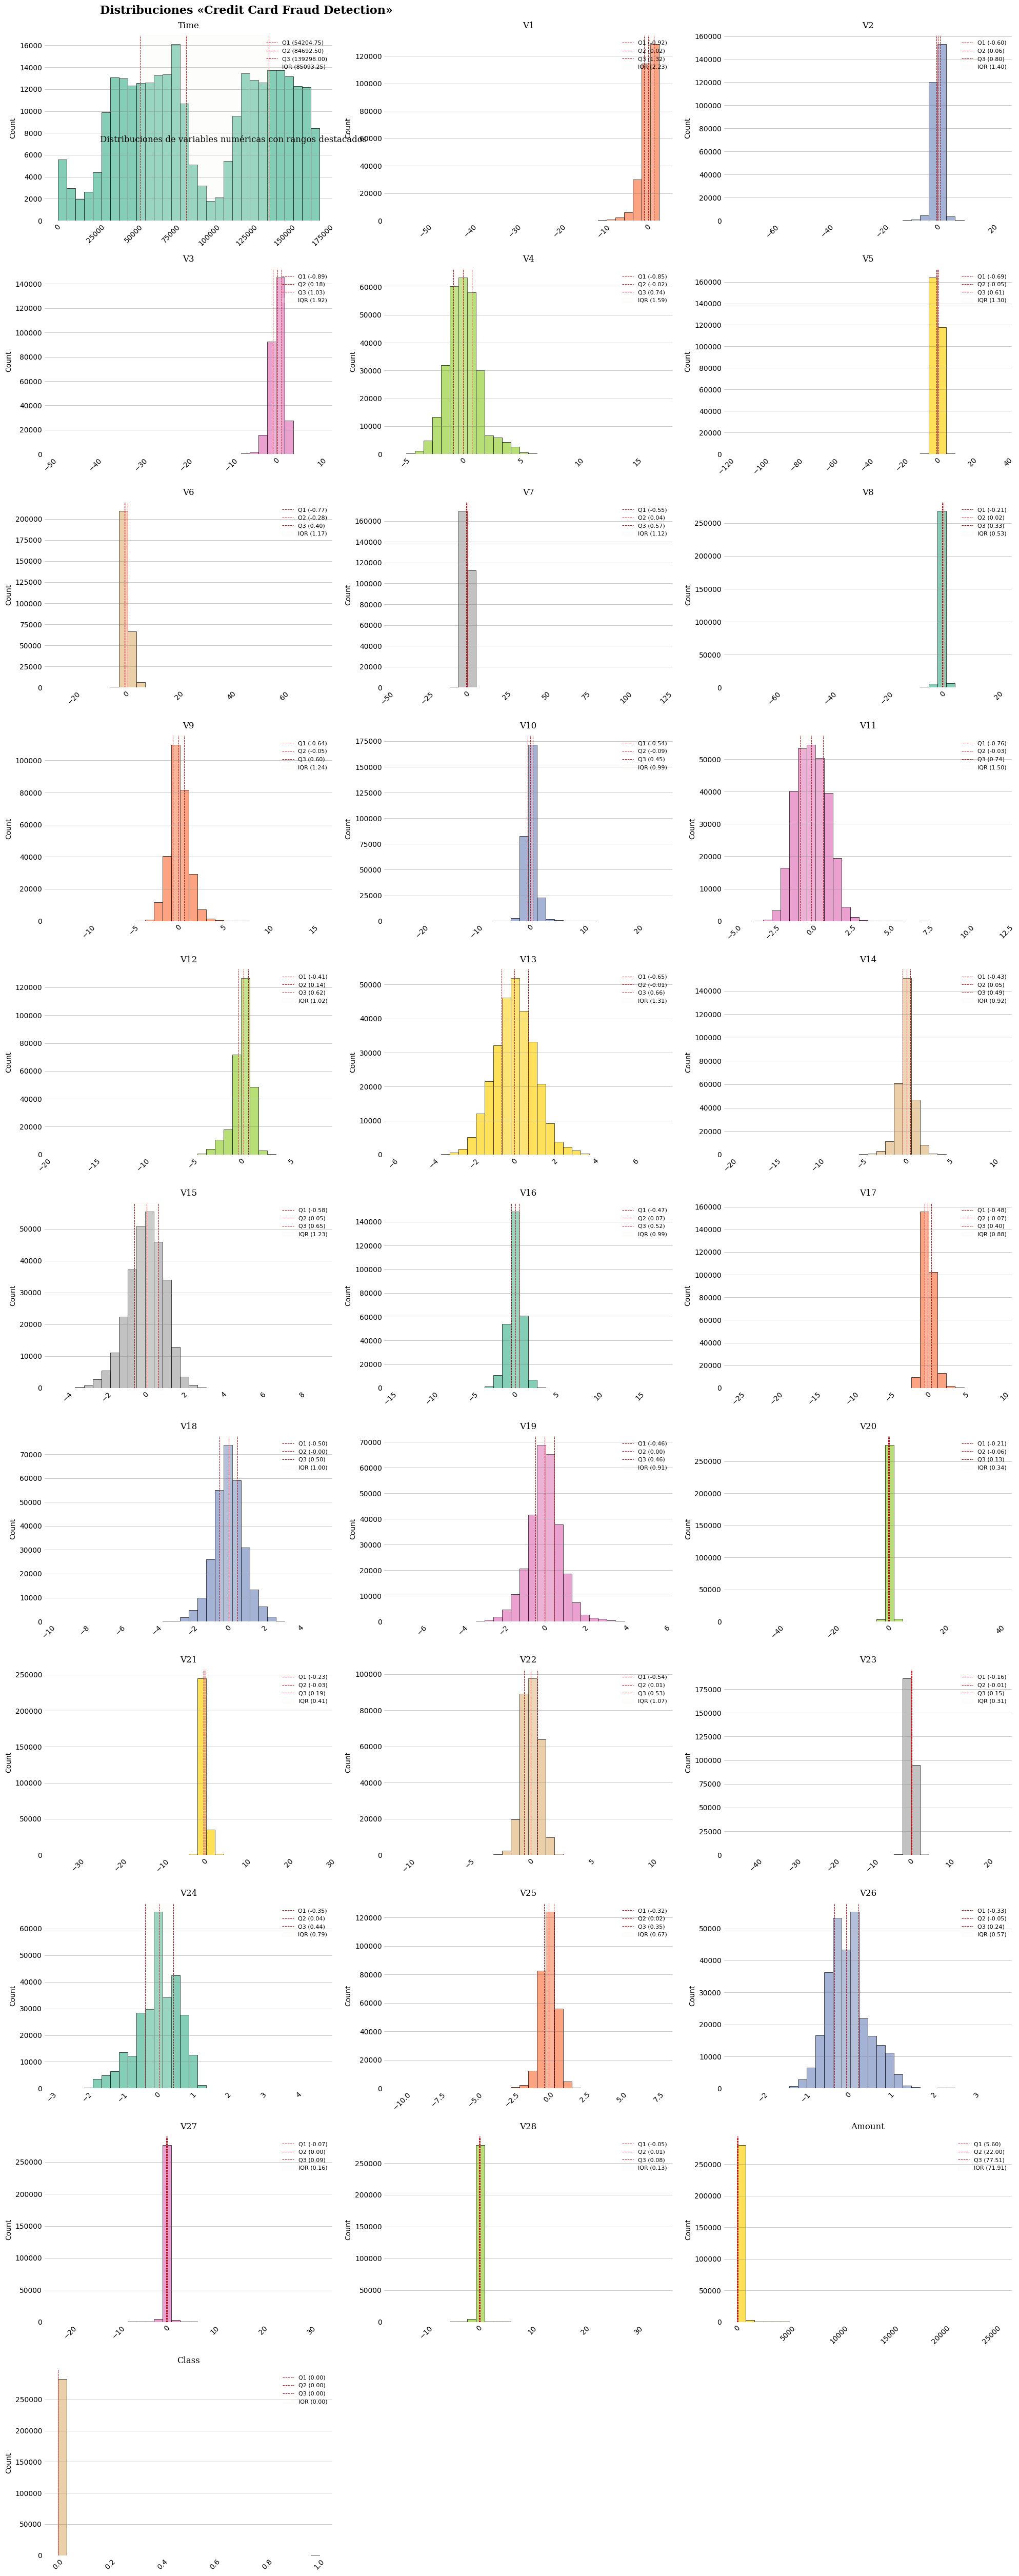

In [8]:
# Llama a la función con el DataFrame `df`
distributionplot = plot_distributions2(
    df,  # Tu DataFrame
    figsize=(20, 50),  # Tamaño de la figura (ancho x alto)
    nrows=11,  # Número de filas en la cuadrícula de subplots
    ncols=3,  # Número de columnas en la cuadrícula de subplots
    bins=30,  # Número de divisiones para el histograma (bins)
    color_palette='Set2',  # Paleta de colores para el diseño
    show_iqr_and_legend=True,  # Mostrar rangos IQR y leyenda
    kde=False,  # Desactivar líneas de densidad (KDE)
    title='Distribuciones «Credit Card Fraud Detection»'  # Título general
)

# Guarda o muestra la figura
#distributionplot.savefig('distributions_plot.png', bbox_inches='tight')  # Guarda como archivo
distributionplot.show()  # Muestra en pantalla

In [9]:
ZXZX

NameError: name 'ZXZX' is not defined

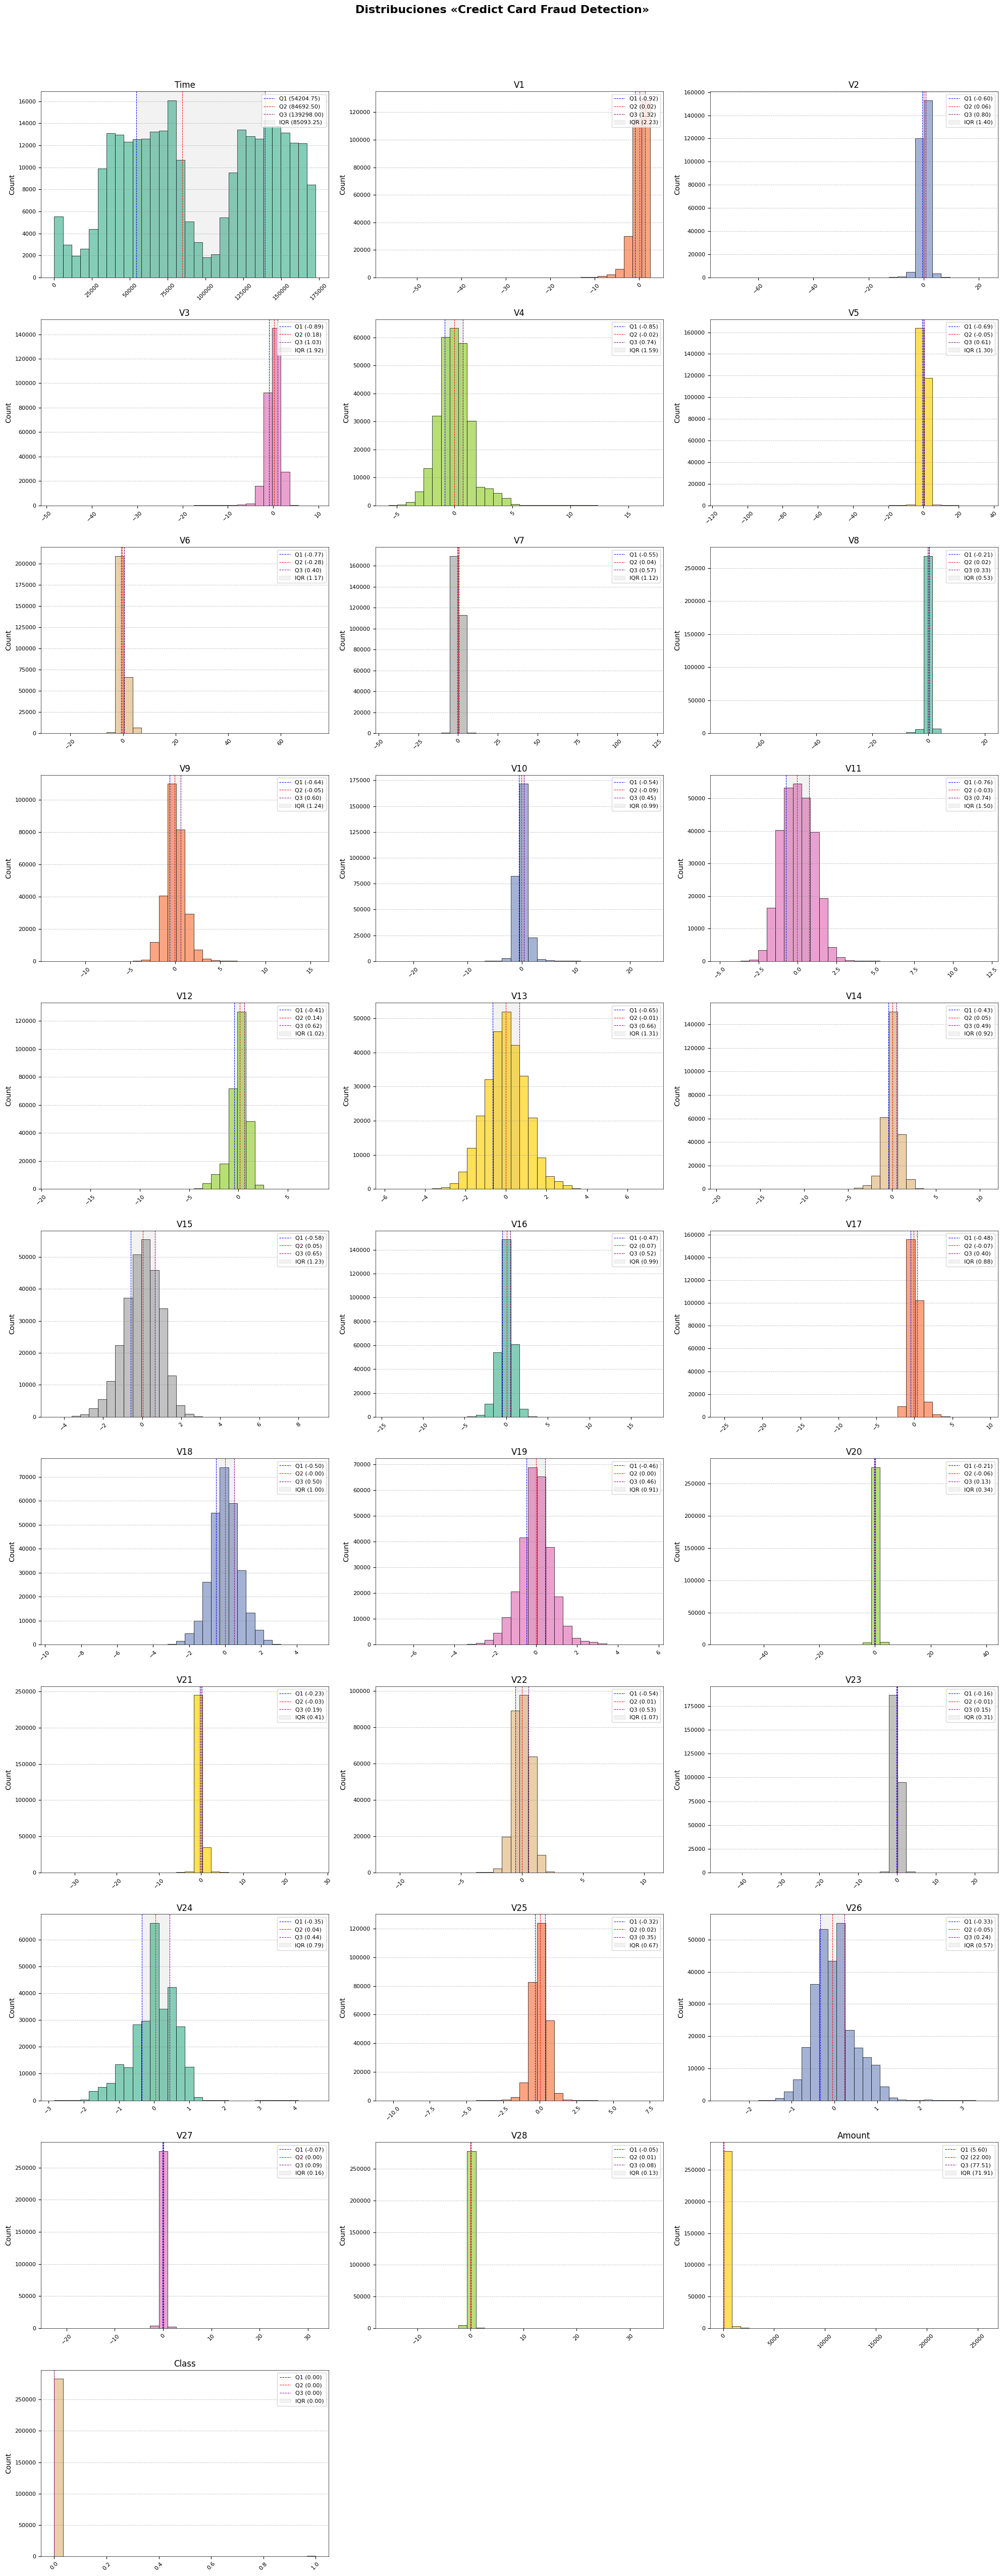

In [30]:
distributionplot = utils.plot_distributions2(
    df,  # DataFrame con los datos a graficar
    figsize=(20, 50),  # Tamaño de la figura (ancho x alto)
    nrows=11,  # Número de filas en la cuadrícula de subplots
    ncols=3,  # Número de columnas en la cuadrícula de subplots
    bins=30,  # Método de cálculo de bins ('rice', 'sqrt', 'sturges', etc.)
    color_palette='Set2',  # Paleta de colores de Seaborn
    show_iqr_and_legend=True,  # Desactivar tanto los rangos IQR como la leyenda
    kde=False,
    title='Distribuciones «Credict Card Fraud Detection»'  # Título de la figura
)


#### **Analisis de valoes Nulos**

In [31]:
utils.calculate_na_statistics(df)

,datos sin NAs en q,Na en q,Na en %
Time,283726,0,0.0
V1,283726,0,0.0
V2,283726,0,0.0
V3,283726,0,0.0
V4,283726,0,0.0
V5,283726,0,0.0
V6,283726,0,0.0
V7,283726,0,0.0
V8,283726,0,0.0
V9,283726,0,0.0


#### **Analisis de Outliers**

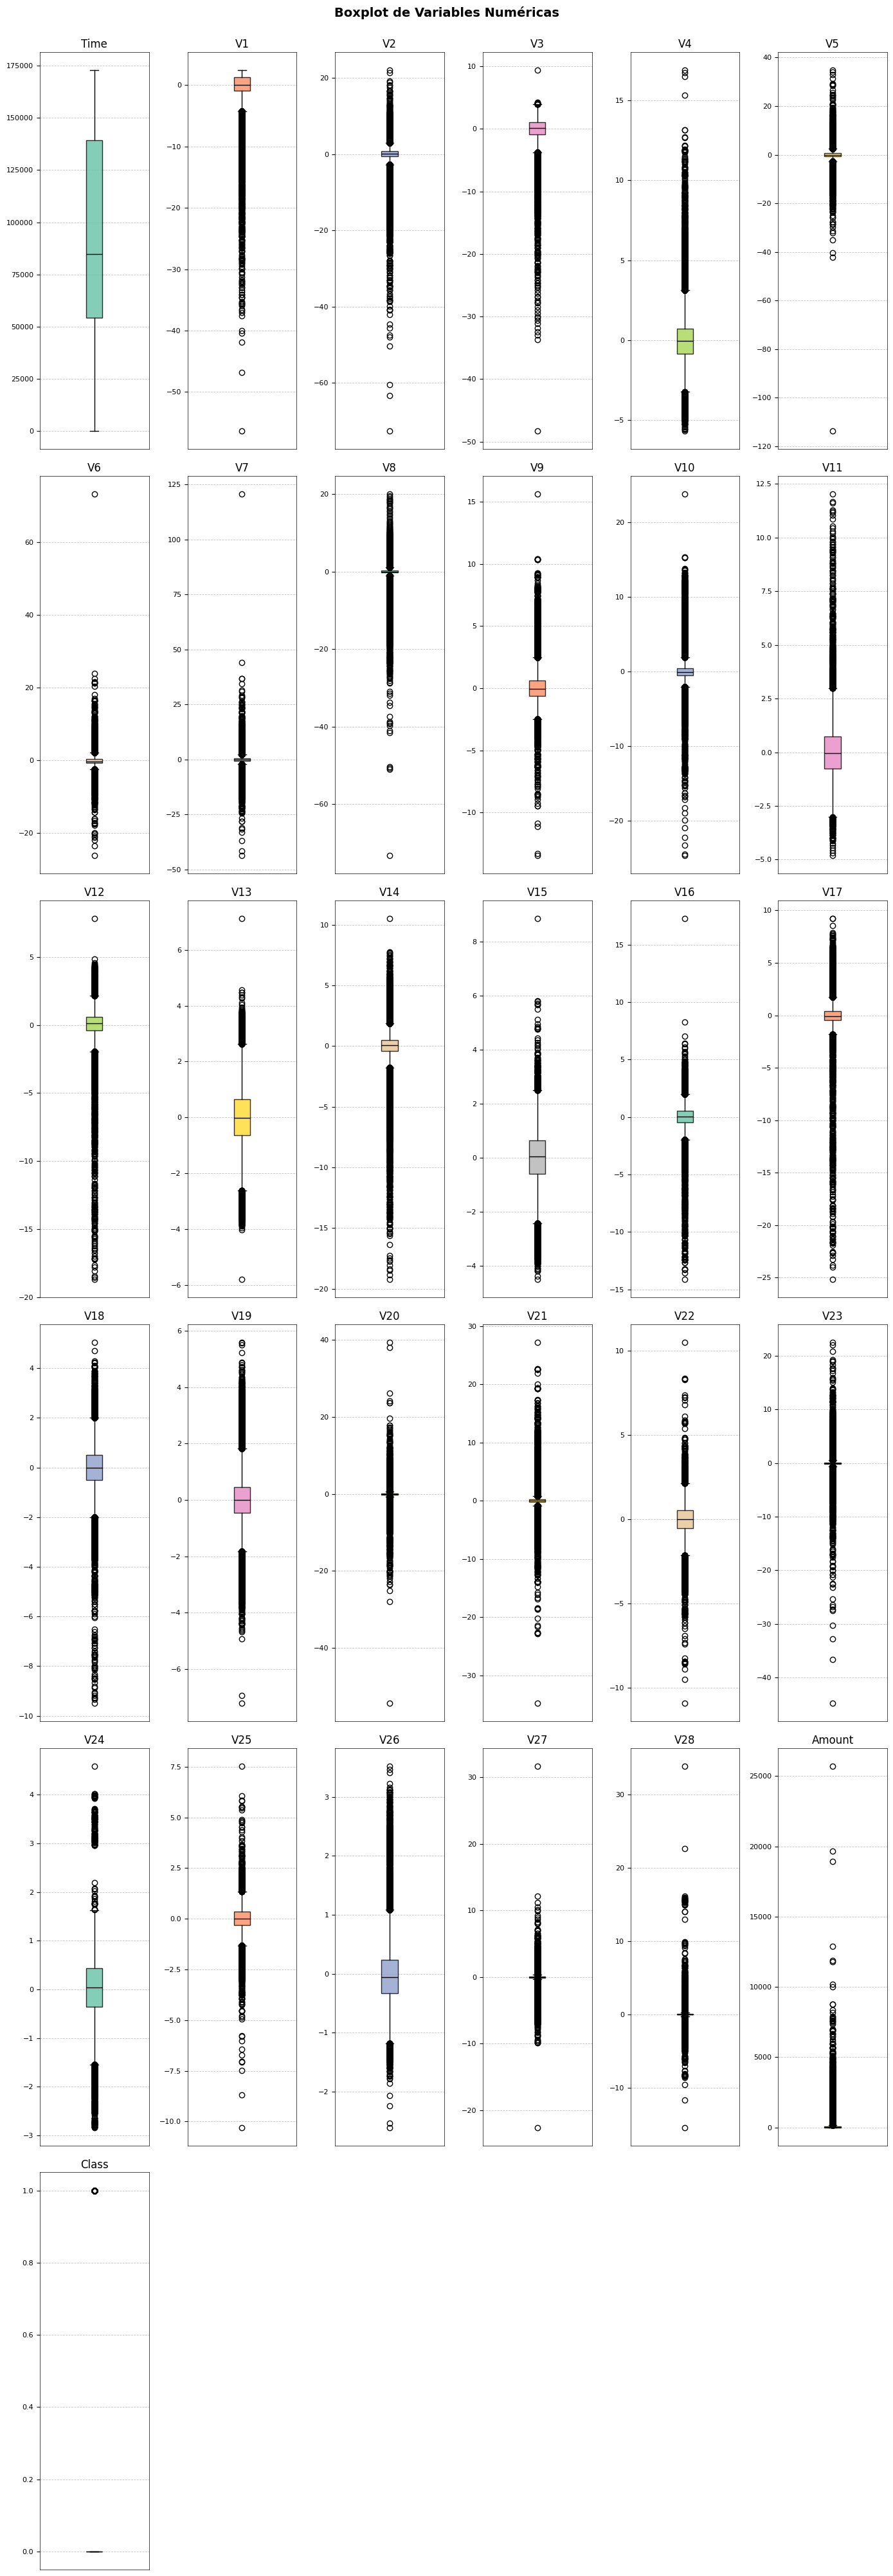

In [32]:
# Con personalización total
boxplots = utils.plot_boxplots(df, 
                    nrows=6,  # Forzar 1 fila 
                    ncols=6,  # Forzar 6 columnas
                    figsize=(14,40),  # Tamaño personalizado
                    color_palette='Set2',  # Paleta diferente
                    grid=True,  # Mostrar cuadrícula
                    title='Boxplot de Variables Numéricas',  # Título personalizado
                    median_color='black',  # Color de línea de mediana
                    box_alpha=0.8)  # Transparencia personalizada
plt.show()


In [33]:
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in df:
    outliers = utils.detect_outliers_iqr(df[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': df[column][~outliers].min(),
        'Upper Bound': df[column][~outliers].max()
    }

outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Time,0.0,0.000000,0.000000,172792.000000
V1,6948.0,2.448841,-4.263957,2.454930
V2,13390.0,4.719342,-2.701076,2.901063
V3,3306.0,1.165209,-3.764603,3.894346
V4,11094.0,3.910110,-3.234792,3.124302
V5,12221.0,4.307325,-2.642497,2.565049
V6,22886.0,8.066233,-2.515798,2.145273
V7,8839.0,3.115330,-2.236876,2.254421
V8,23904.0,8.425030,-1.010584,1.127458
V9,8199.0,2.889760,-2.504447,2.455928


In [34]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}

# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in df:  # Seleccionar solo columnas numéricas
    datos_columna = pd.to_numeric(df[columna], errors='coerce')  # Convertir valores no numéricos a NaN
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas

# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]

# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)

# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df



Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Time,283726.0,94811.08,84692.50,47481.05,0.00,172792.00,54204.75,139298.00
V1,283726.0,0.01,0.02,1.95,-56.41,2.45,-0.92,1.32
V2,283726.0,-0.00,0.06,1.65,-72.72,22.06,-0.60,0.80
V3,283726.0,0.00,0.18,1.51,-48.33,9.38,-0.89,1.03
V4,283726.0,-0.00,-0.02,1.41,-5.68,16.88,-0.85,0.74
V5,283726.0,0.00,-0.05,1.38,-113.74,34.80,-0.69,0.61
V6,283726.0,-0.00,-0.28,1.33,-26.16,73.30,-0.77,0.40
V7,283726.0,0.00,0.04,1.23,-43.56,120.59,-0.55,0.57
V8,283726.0,-0.00,0.02,1.18,-73.22,20.01,-0.21,0.33
V9,283726.0,-0.00,-0.05,1.10,-13.43,15.59,-0.64,0.60


In [35]:
df_scaled = df.copy()
scaler = StandardScaler()
df_scaled[df.columns] = scaler.fit_transform(df[df.columns])
df_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,...,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,-0.040864
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,...,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,-0.040864
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,...,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,-0.040864
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,...,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,-0.040864
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,...,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,-0.040864


In [37]:
df_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,...,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05,2.837260e+05
mean,1.218105e-16,-5.659779e-17,-2.404154e-18,-1.121939e-16,1.422458e-17,3.365816e-17,4.808308e-18,-1.883254e-17,-1.141973e-17,-3.190513e-17,...,-9.215924e-18,1.923323e-17,2.604500e-18,1.412441e-17,4.006924e-17,-1.207086e-17,-5.860126e-18,-1.502596e-19,-5.409347e-17,5.759953e-18
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996823e+00,-2.895933e+01,-4.415594e+01,-3.203279e+01,-4.016602e+00,-8.260323e+01,-1.964022e+01,-3.548131e+01,-6.209721e+01,-1.226160e+01,...,-4.811386e+01,-1.508956e+01,-7.184198e+01,-4.684150e+00,-1.975208e+01,-5.403358e+00,-5.702547e+01,-4.704087e+01,-3.533268e-01,-4.086423e-02
25%,-8.552128e-01,-4.732329e-01,-3.620488e-01,-5.907784e-01,-5.990519e-01,-5.022907e-01,-5.765260e-01,-4.515170e-01,-1.763908e-01,-5.866090e-01,...,-3.148664e-01,-7.489963e-01,-2.595820e-01,-5.856219e-01,-6.086746e-01,-6.781691e-01,-1.829567e-01,-1.626863e-01,-3.309625e-01,-4.086423e-02
50%,-2.131081e-01,7.426456e-03,4.134568e-02,1.182157e-01,-1.363454e-02,-4.015609e-02,-2.057379e-01,3.181559e-02,1.929719e-02,-4.655399e-02,...,-4.015703e-02,9.233221e-03,-1.820863e-02,6.737087e-02,3.167716e-02,-1.085382e-01,-7.187408e-04,3.274220e-02,-2.654671e-01,-4.086423e-02
75%,9.369423e-01,6.725541e-01,4.885028e-01,6.796321e-01,5.251188e-01,4.432736e-01,2.987636e-01,4.632165e-01,2.769666e-01,5.454844e-01,...,2.577181e-01,7.290881e-01,2.365720e-01,7.257359e-01,6.732285e-01,4.981036e-01,2.260181e-01,2.369592e-01,-4.378088e-02,-4.086423e-02
max,1.642362e+00,1.257179e+00,1.339762e+01,6.217985e+00,1.193504e+01,2.527211e+01,5.503507e+01,9.822550e+01,1.696961e+01,1.423708e+01,...,3.757826e+01,1.449606e+01,3.612020e+01,7.569585e+00,1.442736e+01,7.296299e+00,7.987613e+01,1.031847e+02,1.022476e+02,2.447128e+01


In [38]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [45]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical


X = df.drop('Class', axis=1).values
y = df['Class'].values

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=10)  # Ajusta el número de componentes según sea necesario
X_pca = pca.fit_transform(X_scaled)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Preparar los datos para la RNN
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Definir la RNN
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/3


c:\Users\guill\anaconda3\envs\deep_learning\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7094/7094 ━━━━━━━━━━━━━━━━━━━━ 92s 12ms/step - accuracy: 0.9986 - loss: 0.0175 - val_accuracy: 0.9989 - val_loss: 0.0055
Epoch 2/3
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 141s 12ms/step - accuracy: 0.9987 - loss: 0.0064 - val_accuracy: 0.9990 - val_loss: 0.0067
Epoch 3/3
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 78s 11ms/step - accuracy: 0.9990 - loss: 0.0052 - val_accuracy: 0.9991 - val_loss: 0.0049
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9991 - loss: 0.0045
Loss: 0.004885956645011902, Accuracy: 0.9991012811660767
